Here we try a linear regression using the $\textit{normal equation}$ of our data system. That is, whenever we have variables $x_1, \dots, x_n$, with which we try to predict variable $x_{n+1}$ with a multilinear cost function $h = \sum_{i=1}^n\theta_i x_i$, the best choices of $\theta$ are given by the equation $X^TX\theta = X^T x_{n+1}$, where
$$
X = [x_1\ |\ x_2\ |\ \dots \ |\ x_n],\quad \theta = [\theta_1, \theta_2, \dots, \theta_n]^T
$$
and each $x_i$ is a column vector. 

Here is why this equation works theoretically. Given a vector space $V$ and $u \in U \subset V$, we say that $u \in U$ $\textit{approximates}$ $v$ (i.e, $\| v - u\| = \inf_{x \in U}\| v - x\|$) best, if $u$ is paralell to $v$. It follows that, with a linear mapping $M:U \to V$, a vector $u \in U$ satisfies $\| Mu - v \| \inf_{x \in U}\|Mx - v\|$ (that is, $Mu$ best approximates $y$), if and only if it satisfies $M^TMu = M^T v$. We can also show that a solution to the latter equation is unique, if $M$ is injective. 


In our case, $M = X$ from before, and we can find the vector $\theta$, which encodes all of the coefficients $\theta_1, \dots, \theta_n$ of our cost function $h$, by solving our $X$-equation. That is, 
$$
\theta = (X^TX)^{-1}X^Tx_{n+1}.
$$

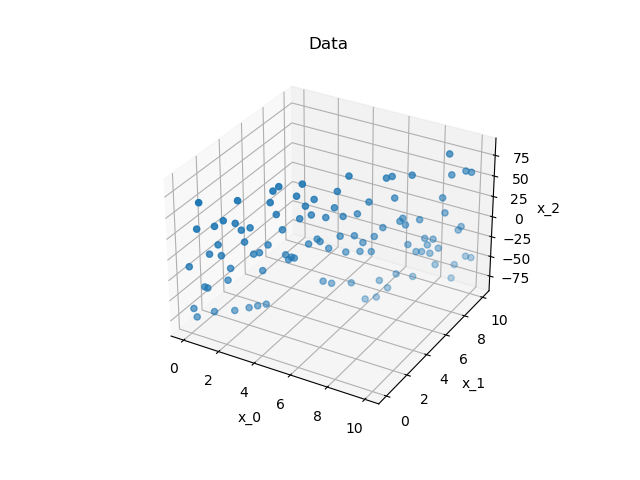

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from matplotlib import cm

import math
import random

x_0 = np.random.uniform(-20, 20, size = (100,))
x_1 = np.random.uniform(-20, 20, size = (100,))

#the real coefficients of the equation. 
#note that there is no reason to do a regression, if we know the parameter values a priori. 
#So let's add a little more randomness with the parameter noise
coeff_1 = np.random.uniform(-5, 5)
coeff_2 = np.random.uniform(-5, 5)
coeffs = [coeff_1, coeff_2]

#initializing the dependent variable z
x_2 = []
for i in range(len(x_0)):
    noise = np.random.uniform(-1, 1)
    x_2.append((coeff_1+noise)*x_0[i] + (coeff_2 + noise)*x_1[i])

#plotting the data, for pedagogical purposes

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x, y, x_2)
ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('x_2')
ax.set_title('Data')
plt.show()

Above, we have ensured by construction that $x_2$ depends linearly on $x_0$ and $x_1$. Now We can create a normal equation for our data, remembering that $(X^T)^T = X$:

In [2]:
#creating a function to solve our normal equation:
def normal_eq_solve(X, x_n):
    XTX = np.matmul(X_transpose, X)
    XTX1 = np.linalg.inv(XTX)
    theta = np.matmul(np.matmul(XTX1, X_transpose), x_n)
    return theta

Now let's (hopefully) create a regression equation $h(x_0, x_1) = \theta_0x_0 + \theta_1x_1$ for our data:

In [3]:
#the matrix for our normal equation
X_transpose = np.array([x_0, x_1])
X = np.transpose(X_transpose)

#notice that X has dimension n x m, given x_1 to x_n, each with m data points.
#in our case, n = 2, m = 100
print('X has dimension', X.shape[0], 'x', X.shape[1], 
      'and X^T has dimension', X_transpose.shape[0], 
      'x', X_transpose.shape[1], '\n')

thetas = normal_eq_solve(X, x_2)
h = thetas[0] * x_0 + thetas[1] * x_1

#lets compare h to y, and the reall coefficients of h to thetas:
for i in range(5):
    print('h =', h[i], ', and x_2 =', x_2[i])
    
print('\n the real coeffcients of h are: \n', coeffs, 
      '\n the thetas we found are \n', thetas)



X has dimension 100 x 2 and X^T has dimension 2 x 100 

h = -26.555908077575047 , and x_2 = -11.32545979011415
h = -39.243205890059514 , and x_2 = -63.382193687489824
h = -78.46664474398364 , and x_2 = -74.51510355325469
h = 13.342274194976216 , and x_2 = 32.746265716969674
h = 64.5116233820029 , and x_2 = 63.64276012715294

 the real coeffcients of h are: 
 [3.10745439416284, -1.5305331714780346] 
 the thetas we found are 
 [ 3.22334504 -1.37942354]


Note that, if we increase the range nosie can take, then are equation will become less accurate. Also, if we did not add the noise variable, the function $\textit{normal_eq_solve}$ would find the right coefficients exactly.

We can visualize $h$ by noticing that $x_1$ and $x_2$ are perpendicular when considered as orthogonal vectors. 

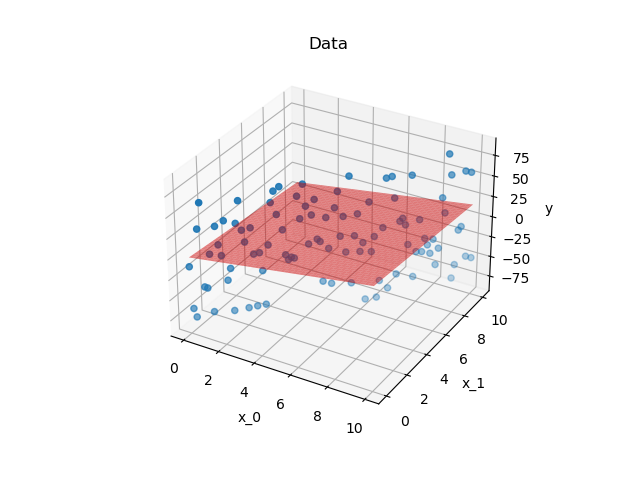

R^2 is 0.9349610750998363


In [4]:
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)

xx, yy = np.meshgrid(x, y)

h_plane = thetas[0] * xx + thetas[1] * yy

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x, y, x_2)
ax.plot_surface(xx, yy, h_plane, alpha = 0.5, color = 'red')

ax.set_xlabel('x_0')
ax.set_ylabel('x_1')
ax.set_zlabel('y')
ax.set_title('Data')
plt.show()


#some basic statistical analysis
residuals = x_2 - h

SSN = np.sum(residuals**2)
SS = np.sum((x_2 - np.average(x_2))**2)

R_squared = 1 - SSN / SS

print('R^2 is', R_squared)